### Predicting decline in the Honey Bee Production

The honeybees are in a precarious state right now. They are declining in abundance in many parts of the world due to various reasons.

In this project, we will investigate this decline and how the trends of the past predict the future for the honeybees. Tha dataset can be found on Kaggle.
We will use Supervised Learning: Linear Regression for the same.

In [1]:
# The import the libraries needed for this project first.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model


In [3]:
# Loading the dataset and investigating it.

df = pd.read_csv(r"C:\Users\amanp\OneDrive\Desktop\honeyproduction.csv")
df.head()

,Unnamed: 0,state,numcol,yieldpercol,totalprod,stocks,priceperlb,prodvalue,year
0,0,AL,16000,71,1136000,159000,0.72,818000,1998
1,1,AZ,55000,60,3300000,1485000,0.64,2112000,1998
2,2,AR,53000,65,3445000,1688000,0.59,2033000,1998
3,3,CA,450000,83,37350000,12326000,0.62,23157000,1998
4,4,CO,27000,72,1944000,1594000,0.70,1361000,1998


For now, we care about the total production of honey per year. Let's use the .groupby() method provided by pandas to get the mean of totalprod per year and store this in a variable called prod_per_year

In [4]:

prod_per_year = df.groupby('year').totalprod.mean().reset_index() # This will group the year column.


In [5]:
# Let's create a variable called X that is the column of years in this prod_per_year DataFrame.
# After creating X, we will need to reshape it to get it into the right format.

X= prod_per_year['year']
X = X.values.reshape(-1,1)

# Let's also create a variable called y that is the totalprod column in the prod_per_year dataset.

y = prod_per_year['totalprod']


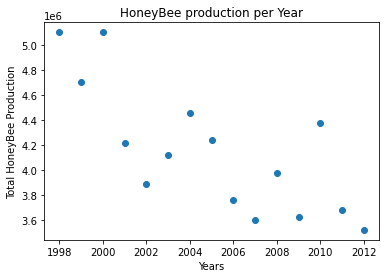

In [7]:
# Using plt.scatter(), let's plot y vs X as a scatterplot.

plt.scatter(X, y)
plt.xlabel('Years')
plt.ylabel('Total HoneyBee Production')
plt.title('HoneyBee production per Year')
plt.show()

### Creating and Fitting a Linear Regression Model

In [9]:

# We will now create a linear regression model from scikit-learn and call it regr.
# We will use the LinearRegression() constructor from the linear_model module to do this.

from sklearn.linear_model import LinearRegression
regr = LinearRegression()

# Now, let's fit the model to the data by using .fit()

regr.fit(X,y)

# After fitting the model, let's now print out the slope of the line (stored in a list called regr.coef_) and the intercept of
# the line (regr.intercept_).

print(regr.coef_[0])
print(regr.intercept_)




-88303.18915238194
181208083.1073298


In [10]:
# Let's create a list called y_predict that is the predictions your regr model would make on the X data


y_predict = regr.predict(X)

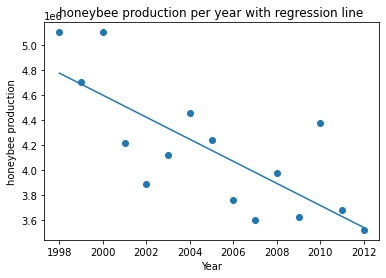

In [11]:
# Let's plot y_predict vs X as a line, on top of our scatterplot using plt.plot()


plt.scatter(X, y)
plt.plot(X, y_predict)
plt.xlabel('Year')
plt.ylabel('honeybee production')
plt.title('honeybee production per year with regression line')
plt.show()

The above graph clearly indicates the continuous decline in the honey bee production every year.

### Predict the Honey decline


So, it looks like the production of honey has been in decline, according to this linear model. Let’s predict what the year 2050 may look like in terms of honey production.

In [12]:
# Our known dataset stops at the year 2013, so let’s create a NumPy array called X_future that is the range from 2013 to 2050
# and eshape it.

X_future = np.array(range(2013, 2051))
X_future = X_future.reshape(-1,1) # think of reshape() as rotating this array. Rather than one big row of numbers, X_future is 
# now a big column of numbers — there’s one number in each row.

# Now create a list called future_predict that is the y-values that your regr model would predict for the values of X_future

future_predict = regr.predict(X_future)


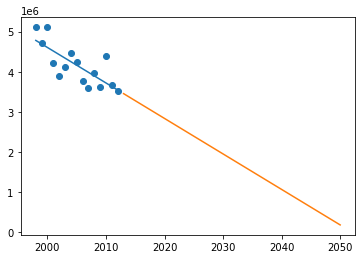

In [13]:
# Finally, let's Plot future_predict vs X_future.

plt.scatter(X, y)
plt.plot(X, y_predict)
plt.plot(X_future, future_predict)
plt.show()

### Conclusion:
The graph depicts the alarming decrease in the honey bee production by the year 2050. This prediction shows the urgent need of focussing into this matter and finding different ways to increase the honey bee production. 